Download the dataset

In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

c:\Users\jacqu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0k/22.0k [00:00<00:00, 16.8MB/s]

Extracting files...
Path to dataset files: C:\Users\jacqu\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


Load the data

In [2]:
import pandas as pd

data = pd.read_csv('Titanic-Dataset.csv')

Handle missing values (drop or fill with mean/mode)

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For the age better to fill with mean values for the age, for Cabin we will fill with Unknown, and for Emabrked we will drop the rows

In [7]:
avg_age = int(data.Age.mean())
avg_age

age_null = data[data.Age.isnull()]
age_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
data.Age.fillna(avg_age, inplace=True)
age_null = data[data.Age.isnull()]
age_null

C:\Users\jacqu\AppData\Local\Temp\ipykernel_26096\2962329423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(avg_age, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
cabin_null = data[data.Cabin.isnull()]
cabin_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S


In [18]:
data.Cabin.fillna('Unknown', inplace=True)
cabin_null = data[data.Cabin.isnull()]
cabin_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
embarked_null = data[data.Embarked.isnull()]
embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [29]:
data.dropna(subset=['Embarked'], inplace=True)
embarked_null = data[data.Embarked.isnull()]
embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Convert categorical variables into numerical (e.g., Sex,
Embarked)

In [32]:
data.Sex.replace({'male':1, 'female':0}, inplace=True)
data[['Name', 'Sex']]

C:\Users\jacqu\AppData\Local\Temp\ipykernel_26096\4136587977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.Sex.replace({'male':1, 'female':0}, inplace=True)


,Name,Sex
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,"Heikkinen, Miss. Laina",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,"Allen, Mr. William Henry",1
...,...,...
886,"Montvila, Rev. Juozas",1
887,"Graham, Miss. Margaret Edith",0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",1


In [44]:
data.Embarked.replace({'S':0 , 'C':1, 'Q':2}, inplace=True)
data[['Name','Embarked']]

,Name,Embarked
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,"Allen, Mr. William Henry",0
...,...,...
886,"Montvila, Rev. Juozas",0
887,"Graham, Miss. Margaret Edith",0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",1


Survival Count

Bar plot of Survived (0 vs. 1)

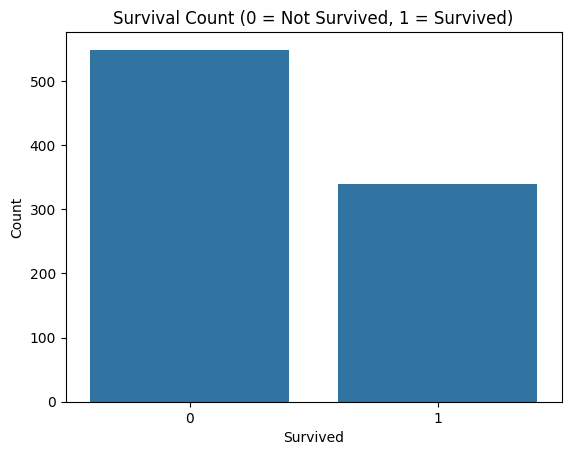

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=data)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Passenger Class Distribution

Bar plot of Pclass

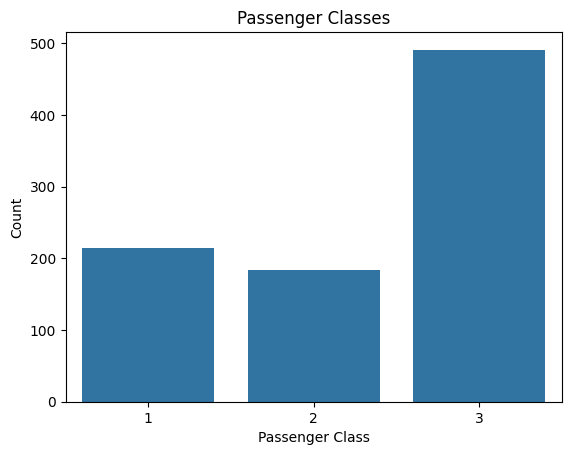

In [188]:
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Sex Distribution

Pie chart of Sex

577
312


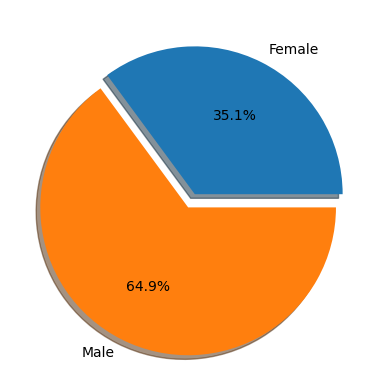

In [132]:
labels = 'Female', 'Male'
male_count = data.Sex.value_counts()[1]
female_count = data.Sex.value_counts()[0]
print(male_count)
print(female_count)

sizes = [female_count, male_count]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.show()

Age Distribution

Histogram of Age

Text(0.5, 1.0, 'Age distribution')

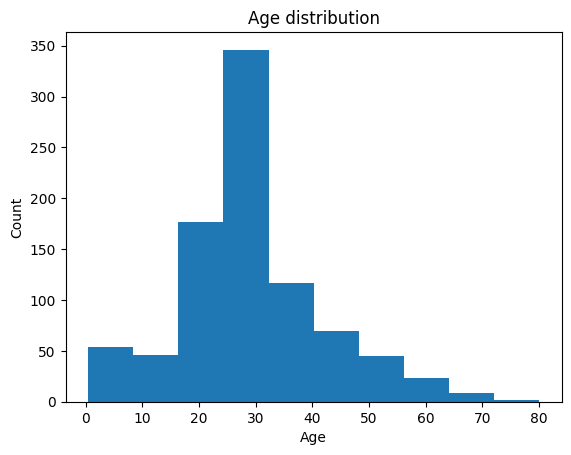

In [140]:
x = data.Age
plt.hist(x)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

Fare Distribution

Histogram of Fare

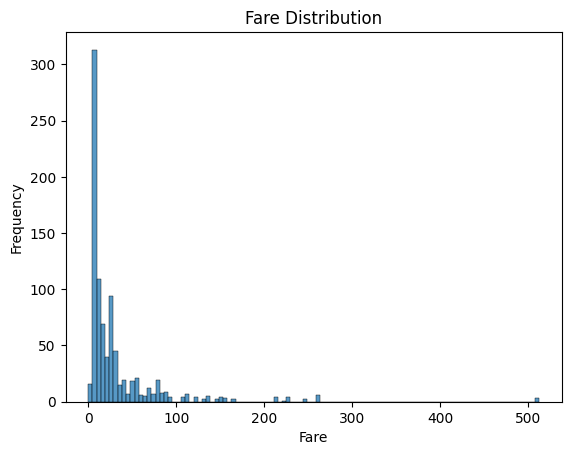

In [263]:
Data = data.Fare
sns.histplot(data=Data)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

Survival by Sex

Bar plot of Survived grouped by Sex

      Sex  Survived  Count
0  Female      Died     81
1  Female  Survived    231
2    Male      Died    468
3    Male  Survived    109


<Axes: xlabel='Sex', ylabel='Count'>

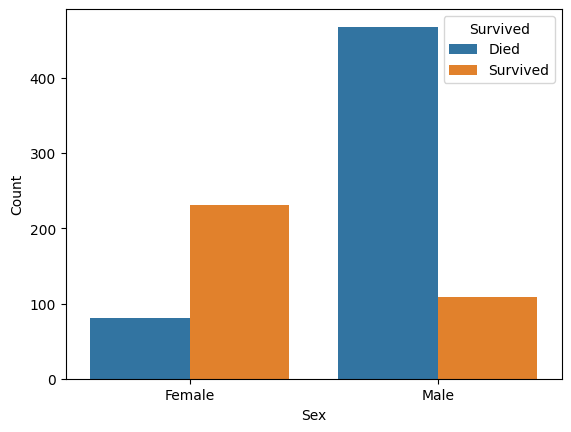

In [189]:
Data = data.groupby(['Sex','Survived']).size().reset_index()
Data.rename(columns={0:'Count'}, inplace=True)

Data['Sex'] = Data['Sex'].map({0: 'Female', 1:'Male'})
Data['Survived'] = Data['Survived'].map({0:'Died', 1:'Survived'})
print(Data)

sns.barplot(data=Data, x='Sex', y='Count', hue='Survived')



Embarked by Sex

Bar plot of Embarked grouped by Sex

,Sex,Embarked,Count
0,Female,Southampton,203
1,Female,Cherbourg,73
2,Female,Queenstown,36
3,Male,Southampton,441
4,Male,Cherbourg,95
5,Male,Queenstown,41


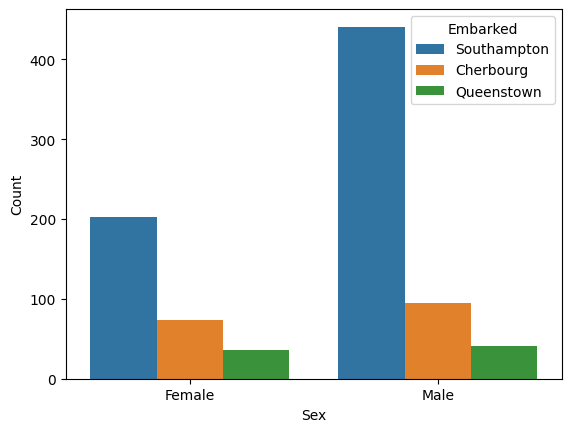

In [205]:
Data = data.groupby(['Sex', 'Embarked']).size().reset_index(name='Count')
Data['Embarked'] = Data['Embarked'].map({1:'Cherbourg', 2:'Queenstown', 0:'Southampton'})
Data['Sex'] = Data['Sex'].map({0:'Female', 1:'Male'})

sns.barplot(data=Data, x='Sex', y='Count', hue='Embarked')
Data

Age vs. Survival

Histogram or KDE plot comparing Age for survived vs. not

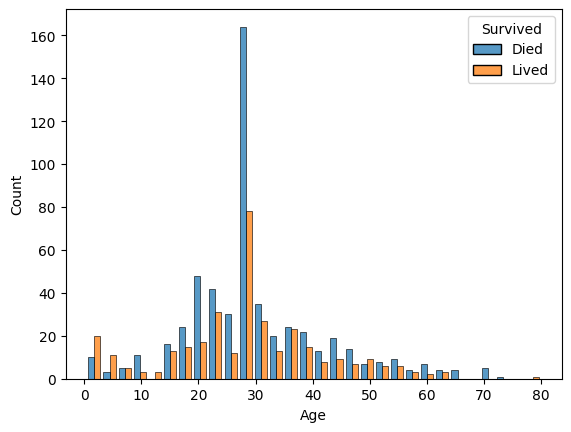

In [226]:
data['Survived'] = data['Survived'].map({0:'Died', 1:'Lived'})
sns.histplot(data=data, x='Age', hue='Survived', multiple='dodge', stat='count', shrink=0.8)

plt.show()


Fare vs. Survival

Boxplot or violin plot of Fare grouped by Survived

,Survived,Fare,0
0,Died,0.0000,14
1,Died,4.0125,1
2,Died,5.0000,1
3,Died,6.2375,1
4,Died,6.4375,1
...,...,...,...
324,Lived,227.5250,3
325,Lived,247.5208,1
326,Lived,262.3750,2
327,Lived,263.0000,2


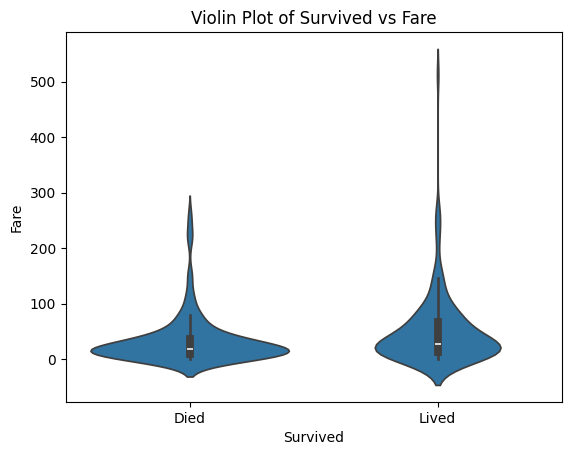

In [239]:
Data = data.groupby(['Survived', 'Fare']).size().reset_index()
sns.violinplot(data=Data, x='Survived', y='Fare')
plt.title('Violin Plot of Survived vs Fare')

Data

Fare vs. Survival

Boxplot or violin plot of Fare grouped by Survived

Text(0.5, 1.0, 'Violin Plot of Survived vs Fare')

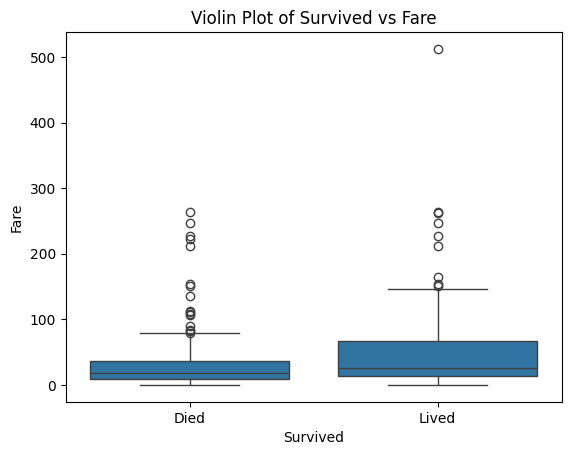

In [238]:
Data = data.groupby(['Survived', 'Fare']).size().reset_index()
sns.boxplot(data=Data, x='Survived', y='Fare')
plt.title('Violin Plot of Survived vs Fare')


Combined: Survival by Class and Sex

Grouped bar plot or stacked bar plot of Survived by Pclass and Sex

       Sex  Pclass Survived  Count
0   Female       1     Died      3
1   Female       1    Lived     89
2   Female       2     Died      6
3   Female       2    Lived     70
4   Female       3     Died     72
5   Female       3    Lived     72
6     Male       1     Died     77
7     Male       1    Lived     45
8     Male       2     Died     91
9     Male       2    Lived     17
10    Male       3     Died    300
11    Male       3    Lived     47


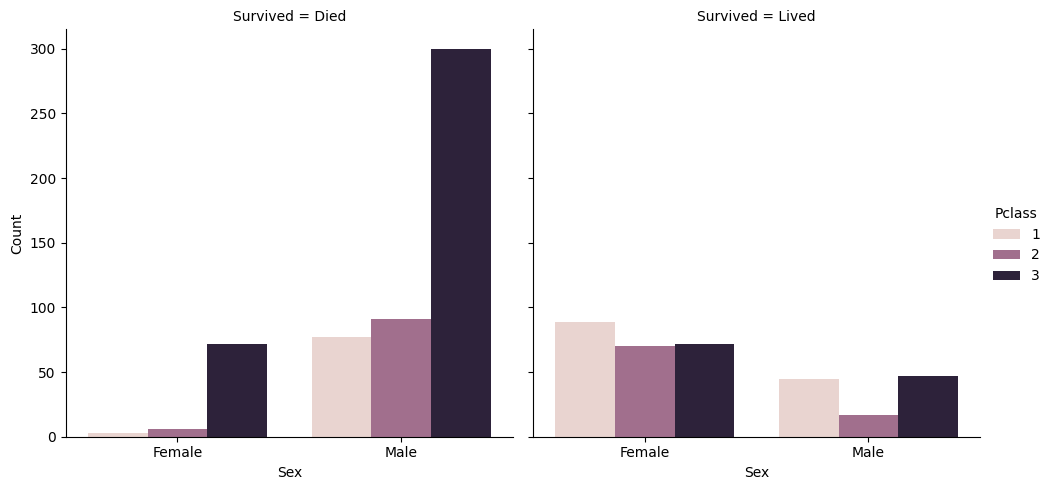

In [254]:
Data = data.groupby(['Sex','Pclass','Survived']).size().reset_index(name='Count')
Data['Sex'] = Data['Sex'].map({0: 'Female', 1:'Male'})

print(Data)

sns.catplot(data=Data, x='Sex', y='Count', hue='Pclass', col='Survived', kind='bar')

Heatmap of Feature Correlations

Correlation matrix heatmap for numerical variables

      Age     Fare  SibSp  Parch
0    22.0   7.2500      1      0
1    38.0  71.2833      1      0
2    26.0   7.9250      0      0
3    35.0  53.1000      1      0
4    35.0   8.0500      0      0
..    ...      ...    ...    ...
886  27.0  13.0000      0      0
887  19.0  30.0000      0      0
888  29.0  23.4500      1      2
889  26.0  30.0000      0      0
890  32.0   7.7500      0      0

[889 rows x 4 columns]


<Axes: >

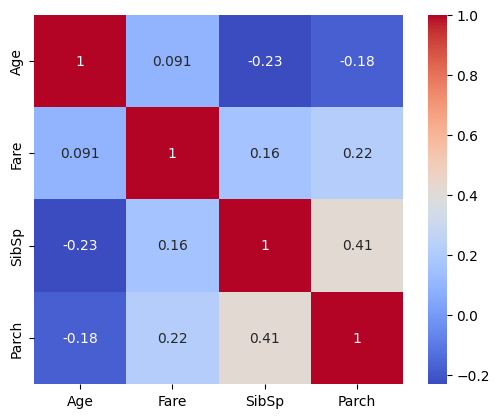

In [258]:
Data = data[['Age', 'Fare', 'SibSp', 'Parch']]
print(Data)
correlation = Data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)


